In [ ]:
# As usual, a bit of setup

import time

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

# command prepended by a % are called 'magic functions'
# this command make inline plots in the notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [29]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
# iteritems return an iterator
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


# Affine layer: forward
Open the file `cs231n/layers.py` and implement the `affine_forward` function.

Once you are done you can test your implementaion by running the following:

In [ ]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * reduce(lambda x, y: x * y, input_shape)   # or np.prod(input_shape)
weight_size = output_dim * reduce(lambda x, y: x * y, input_shape)

# the * operator can be used only inside function calls. It unbox a tuple and pass the single elements
# as single parameters in a function.
x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)  # x.shape is (2, 4, 5, 6) 
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)  # w.shape is (120, 3)
b = np.linspace(-0.3, 0.1, num=output_dim)  # b.shape is (3,)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[1.49834967,  1.70660132,  1.91485297],
                        [3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print 'Testing affine_forward function:'
print 'difference: ', rel_error(out, correct_out)

Testing affine_forward function:
difference:  9.76984946819e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [31]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around 1e-10
print 'Testing affine_backward function:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

Testing affine_backward function:
dx error:  3.84609817655e-10
dw error:  1.44670320353e-10
db error:  6.5482444032e-12


# ReLU layer: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

In [32]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print 'Testing relu_forward function:'
print 'difference: ', rel_error(out, correct_out)

Testing relu_forward function:
difference:  4.99999979802e-08


# ReLU layer: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking:

In [33]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12
print 'Testing relu_backward function:'
print 'dx error: ', rel_error(dx_num, dx)

Testing relu_backward function:
dx error:  3.27561925531e-12


# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define several convenience layers in the file `cs231n/layer_utils.py`.

For now take a look at the `affine_relu_forward` and `affine_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [34]:
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

print 'Testing affine_relu_forward:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

Testing affine_relu_forward:
dx error:  1.67226605142e-10
dw error:  3.43019498908e-09
db error:  1.7449734839e-10


# Loss layers: Softmax

You can make sure that the implementations are correct by running the following:

In [35]:
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be 2.3 and dx error should be 1e-8
print '\nTesting softmax_loss:'
print 'loss: ', loss
print 'dx error: ', rel_error(dx_num, dx)

Testing svm_loss:
loss:  8.99796798178
dx error:  1.40215660067e-09

Testing softmax_loss:
loss:  2.30238233529
dx error:  8.43754553743e-09


# Multilayer network
Next you will implement a fully-connected network with an arbitrary number of hidden layers.

Read through the `FullyConnectedNet` class in the file `cs231n/classifiers/fc_net.py`.

Implement the initialization, the forward pass, and the backward pass.

## Initial loss and gradient check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. Do the initial losses seem reasonable?

For gradient checking, you should expect to see errors around 1e-6 or less.

In [36]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
  print 'Running check with reg = ', reg
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

  loss, grads = model.loss(X, y)
  print 'Initial loss: ', loss

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
    print '%s relative error: %.2e' % (name, rel_error(grad_num, grads[name]))

Running check with reg =  0
Initial loss:  2.30579302242
W1 relative error: 1.27e-05
W2 relative error: 2.60e-05
W3 relative error: 2.22e-07
b1 relative error: 1.11e-08
b2 relative error: 2.08e-09
b3 relative error: 6.98e-11
Running check with reg =  3.14
Initial loss:  6.94882303327
W1 relative error: 5.26e-09
W2 relative error: 3.59e-07
W3 relative error: 1.37e-08
b1 relative error: 4.14e-08
b2 relative error: 9.10e-09
b3 relative error: 1.83e-10


As another sanity check, make sure you can overfit a small dataset of 50 images. First we will try a three-layer network with 100 units in each hidden layer. You will need to tweak the learning rate and initialization scale, but you should be able to overfit and achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 31.378859
(Epoch 0 / 20) train acc: 0.220000; val_acc: 0.127000
(Epoch 1 / 20) train acc: 0.180000; val_acc: 0.089000
(Epoch 2 / 20) train acc: 0.440000; val_acc: 0.114000
(Epoch 3 / 20) train acc: 0.620000; val_acc: 0.120000
(Epoch 4 / 20) train acc: 0.660000; val_acc: 0.149000
(Epoch 5 / 20) train acc: 0.820000; val_acc: 0.142000
(Iteration 11 / 40) loss: 2.017146
(Epoch 6 / 20) train acc: 0.940000; val_acc: 0.127000
(Epoch 7 / 20) train acc: 0.960000; val_acc: 0.128000
(Epoch 8 / 20) train acc: 1.000000; val_acc: 0.128000
(Epoch 9 / 20) train acc: 1.000000; val_acc: 0.132000
(Epoch 10 / 20) train acc: 1.000000; val_acc: 0.128000
(Iteration 21 / 40) loss: 0.000395
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.127000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.126000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.126000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.128000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.128000
(Iteration 31 / 40) loss:

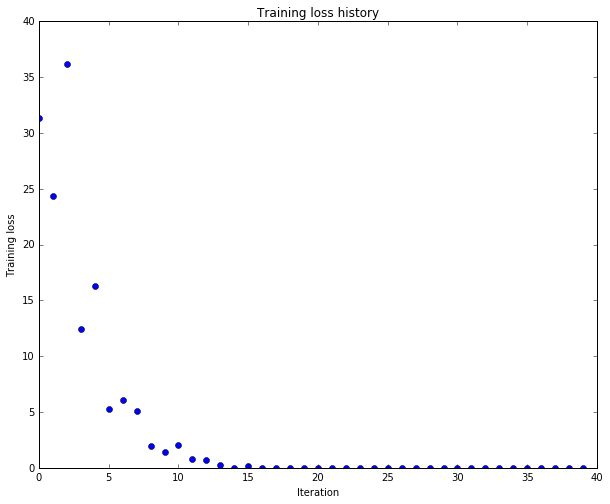

In [37]:
# TODO: Use a three-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = (1e-1)/2.0
learning_rate = 1e-3
model = FullyConnectedNet([100, 100],
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples. Again you will have to adjust the learning rate and weight initialization, but you should be able to achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: 2.235213
(Epoch 0 / 20) train acc: 0.360000; val_acc: 0.102000
(Epoch 1 / 20) train acc: 0.400000; val_acc: 0.108000
(Epoch 2 / 20) train acc: 0.460000; val_acc: 0.132000
(Epoch 3 / 20) train acc: 0.540000; val_acc: 0.132000
(Epoch 4 / 20) train acc: 0.600000; val_acc: 0.107000
(Epoch 5 / 20) train acc: 0.520000; val_acc: 0.120000
(Iteration 11 / 40) loss: 1.196010
(Epoch 6 / 20) train acc: 0.620000; val_acc: 0.154000
(Epoch 7 / 20) train acc: 0.780000; val_acc: 0.178000
(Epoch 8 / 20) train acc: 0.720000; val_acc: 0.149000
(Epoch 9 / 20) train acc: 0.860000; val_acc: 0.156000
(Epoch 10 / 20) train acc: 0.940000; val_acc: 0.164000
(Iteration 21 / 40) loss: 0.269499
(Epoch 11 / 20) train acc: 0.940000; val_acc: 0.154000
(Epoch 12 / 20) train acc: 0.960000; val_acc: 0.155000
(Epoch 13 / 20) train acc: 0.980000; val_acc: 0.156000
(Epoch 14 / 20) train acc: 0.960000; val_acc: 0.153000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.163000
(Iteration 31 / 40) loss: 

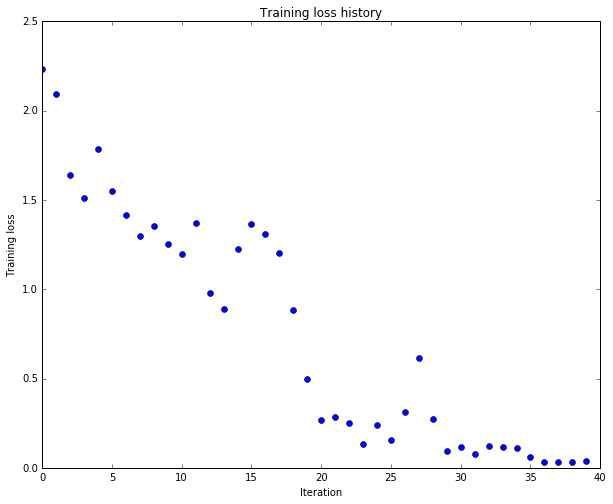

In [38]:
# TODO: Use a five-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

learning_rate = 0.021  # was 1e-3
weight_scale = 0.036 # was 1e-5
model = FullyConnectedNet([100, 100, 100, 100],
                weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochstic gradient descent.

On the file `cs231n/optim.py` implement the SGD+momentum update rule (both regular momentum and Nesterov's one) in the function `sgd_momentum` and run the following to check your implementation. You should see errors less than 1e-8.

In [39]:
from cs231n.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print 'next_w error: ', rel_error(next_w, expected_next_w)
print 'velocity error: ', rel_error(expected_velocity, config['velocity'])

next_w error:  8.88234703351e-09
velocity error:  4.26928774328e-09


Once you have done so, run the following to train a six-layer network with both SGD and SGD+momentum. You should see the SGD+momentum update rule converge faster.

running with  sgd
(Iteration 1 / 200) loss: 2.729301
(Epoch 0 / 5) train acc: 0.107000; val_acc: 0.116000
(Iteration 11 / 200) loss: 2.219644
(Iteration 21 / 200) loss: 2.093499
(Iteration 31 / 200) loss: 2.072820
(Epoch 1 / 5) train acc: 0.298000; val_acc: 0.262000
(Iteration 41 / 200) loss: 2.001172
(Iteration 51 / 200) loss: 2.052472
(Iteration 61 / 200) loss: 1.960695
(Iteration 71 / 200) loss: 1.913510
(Epoch 2 / 5) train acc: 0.332000; val_acc: 0.282000
(Iteration 81 / 200) loss: 1.926247
(Iteration 91 / 200) loss: 1.810186
(Iteration 101 / 200) loss: 1.840534
(Iteration 111 / 200) loss: 1.747429
(Epoch 3 / 5) train acc: 0.367000; val_acc: 0.324000
(Iteration 121 / 200) loss: 1.805224
(Iteration 131 / 200) loss: 1.686572
(Iteration 141 / 200) loss: 1.741686
(Iteration 151 / 200) loss: 1.719418
(Epoch 4 / 5) train acc: 0.396000; val_acc: 0.335000
(Iteration 161 / 200) loss: 1.597114
(Iteration 171 / 200) loss: 1.654701
(Iteration 181 / 200) loss: 1.633792
(Iteration 191 / 200) los

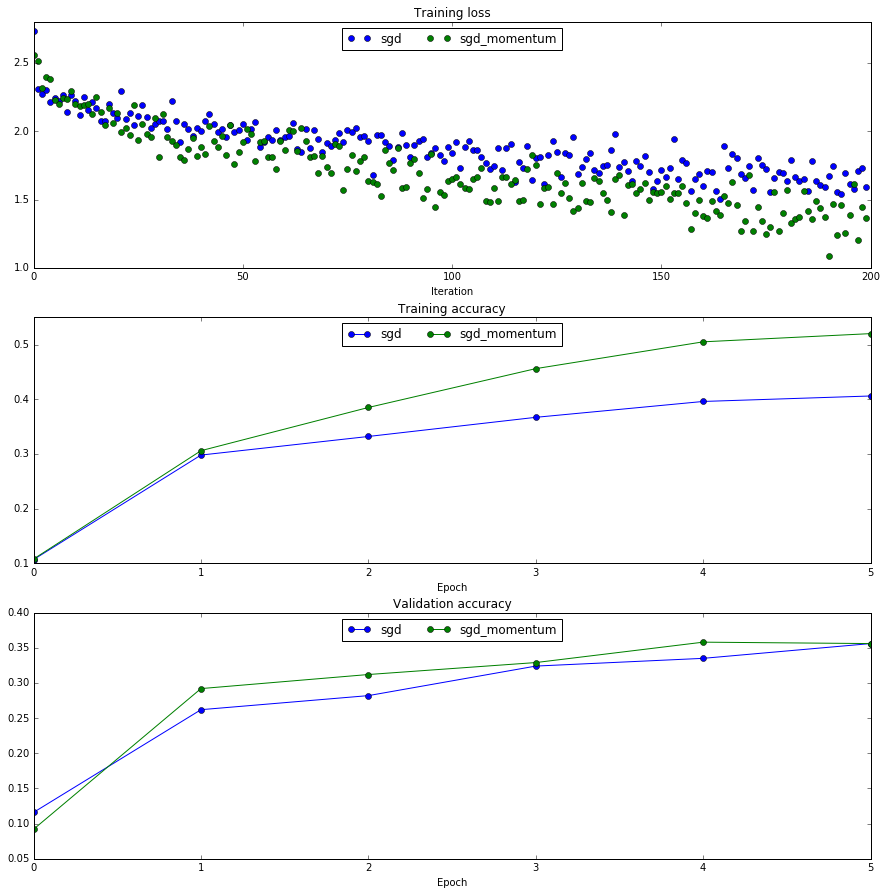

In [40]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
  print 'running with ', update_rule
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 1e-2,
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# Train a good model!
Train the best fully-connected model that you can on CIFAR-10, storing your best model in the `best_model` variable. We require you to get at least 50% accuracy on the validation set using a fully-connected net.

If you are careful it should be possible to get accuracies above 55%, but we don't require it for this part and won't assign extra credit for doing so. Later in the assignment we will ask you to train the best convolutional network that you can on CIFAR-10, and we would prefer that you spend your effort working on convolutional nets rather than fully-connected nets.

You might find it useful to complete the `BatchNormalization.ipynb` and `Dropout.ipynb` notebooks before completing this part, since those techniques can help you train powerful models.

(Iteration 1 / 1910) loss: 37.260166
(Epoch 0 / 5) train acc: 0.166000; val_acc: 0.171000
(Iteration 101 / 1910) loss: 2.504144
(Iteration 201 / 1910) loss: 1.896891
(Iteration 301 / 1910) loss: 1.874243
(Epoch 1 / 5) train acc: 0.429000; val_acc: 0.364000
(Iteration 401 / 1910) loss: 1.742166
(Iteration 501 / 1910) loss: 1.743846
(Iteration 601 / 1910) loss: 1.583012
(Iteration 701 / 1910) loss: 1.437863
(Epoch 2 / 5) train acc: 0.439000; val_acc: 0.432000
(Iteration 801 / 1910) loss: 1.601952
(Iteration 901 / 1910) loss: 1.589477
(Iteration 1001 / 1910) loss: 1.494035
(Iteration 1101 / 1910) loss: 1.402985
(Epoch 3 / 5) train acc: 0.508000; val_acc: 0.478000
(Iteration 1201 / 1910) loss: 1.229560
(Iteration 1301 / 1910) loss: 1.242069
(Iteration 1401 / 1910) loss: 1.236941
(Iteration 1501 / 1910) loss: 1.265322
(Epoch 4 / 5) train acc: 0.526000; val_acc: 0.464000
(Iteration 1601 / 1910) loss: 1.411626
(Iteration 1701 / 1910) loss: 1.203056
(Iteration 1801 / 1910) loss: 1.286238
(Iter

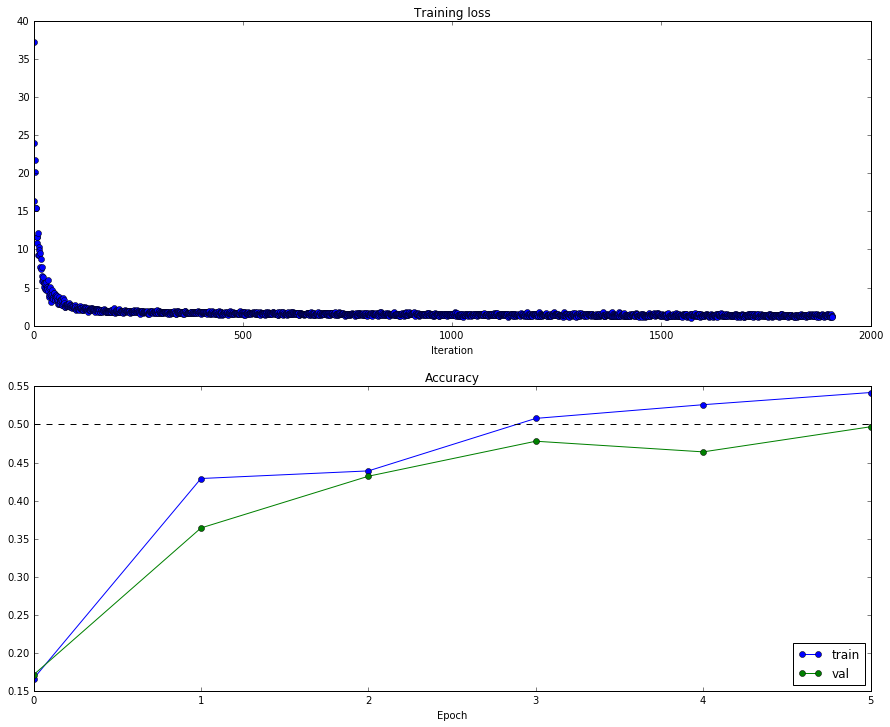

In [ ]:
best_model = None
weight_scale = 5e-2
learning_rate = 1e-3
model = FullyConnectedNet([200, 200, 200],
              weight_scale=weight_scale, dtype=np.float64, reg = 0.00001)
solver = Solver(model, data,
                print_every=100, num_epochs=5, batch_size=128,
                update_rule='adam',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()
 
best_model = model 

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Test you model
Run your best model on the validation and test sets. You should achieve above 50% accuracy on the validation set.

In [45]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()

Validation set accuracy:  0.497
Test set accuracy:  0.487
